# Exoplanet-radius Prediction
## Objective
Predict a variable about an exoplanet using only features of the planet's star. In this case, I somewhat arbitrarily picked the  planet's radius to predict based on the fact that it was one of the more complete features of the dataset.

## Data
A huge [list of exoplanets from NASA](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets) and then for the [definitions of what the columns represent](https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html).

### Importing the data
Standard use of Pandas to import the data as a dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

planet_data = pd.read_csv('planets.csv')
planet_data.head()

rowid pl_hostname pl_letter     pl_name    pl_discmethod  pl_controvflag  \
0      1      11 Com         b    11 Com b  Radial Velocity               0   
1      2      11 UMi         b    11 UMi b  Radial Velocity               0   
2      3      14 And         b    14 And b  Radial Velocity               0   
3      4      14 Her         b    14 Her b  Radial Velocity               0   
4      5    16 Cyg B         b  16 Cyg B b  Radial Velocity               0   

   pl_pnum   pl_orbper  pl_orbsmax  pl_orbeccen  ...  st_bmvj  st_vjmic  \
0        1   326.03000        1.29        0.231  ...    1.010       NaN   
1        1   516.21997        1.53        0.080  ...    1.369       NaN   
2        1   185.84000        0.83        0.000  ...    1.020       NaN   
3        1  1773.40002        2.93        0.370  ...    0.880       NaN   
4        1   798.50000        1.66        0.680  ...    0.660       NaN   

  st_vjmrc  st_jmh2  st_hmk2  st_jmk2  st_bmy  st_m1  st_c1 st_colorn  
0      NaN    0.459    0.202    0.661     NaN    NaN    NaN         7  
1      NaN    0.785    0.152    0.937     NaN    NaN    NaN         5  
2      NaN    0.411    0.277    0.688     NaN    NaN    NaN         7  
3      NaN    0.355    0.089    0.444   0.537  0.366  0.438         9  
4      NaN    0.298    0.044    0.342   0.418  0.222  0.351        17  

[5 rows x 144 columns]

### Filtering
There's quite a variety in the features offered. There are a lot of qualitative and planet variables that we want to either remove or convert. Not to mention, there are still plenty of planet features that I want to remove in order to isolate only variables relating to the star. However, I will need to pick at least one planet variable to predict.

In [2]:
#Filter out non-numeric data
planet_data = planet_data._get_numeric_data()
planet_data = planet_data.select_dtypes(include=['float64'])

planet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 94 columns):
pl_orbper      3902 non-null float64
pl_orbsmax     2326 non-null float64
pl_orbeccen    1340 non-null float64
pl_orbincl     799 non-null float64
pl_bmassj      1570 non-null float64
pl_radj        3112 non-null float64
pl_dens        443 non-null float64
ra             4009 non-null float64
dec            4009 non-null float64
st_dist        4003 non-null float64
gaia_dist      3838 non-null float64
st_optmag      3837 non-null float64
gaia_gmag      3865 non-null float64
st_teff        3810 non-null float64
st_mass        3236 non-null float64
st_rad         3681 non-null float64
pl_astflag     4000 non-null float64
pl_angsep      2320 non-null float64
pl_orbtper     476 non-null float64
pl_orblper     723 non-null float64
pl_rvamp       1229 non-null float64
pl_eqt         604 non-null float64
pl_insol       243 non-null float64
pl_massj       840 non-null float64
pl_msinij   

#### Observations
Ok so right away there are a lot of null values. So we will need to filter those out. Here is also where I decided to pick 'pl_radj' as the target variable because it has a decent amount of non-null values.

In [3]:
#Remove columns that do not start with 'st_' and keep 'pl_radj'
for col in planet_data.columns:
    if 'st_' not in col and col != 'pl_radj':
        planet_data = planet_data.drop([col], axis=1)

#Keep only target variables that are not NaN
planet_data = planet_data[planet_data.pl_radj.notnull()]
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 11 to 3995
Data columns (total 59 columns):
pl_radj      3112 non-null float64
st_dist      3111 non-null float64
st_optmag    3048 non-null float64
st_teff      3057 non-null float64
st_mass      2350 non-null float64
st_rad       3078 non-null float64
st_rah       3112 non-null float64
st_glon      3112 non-null float64
st_glat      3112 non-null float64
st_elon      3112 non-null float64
st_elat      3112 non-null float64
st_plx       1390 non-null float64
st_pmra      3073 non-null float64
st_pmdec     3073 non-null float64
st_pm        3073 non-null float64
st_radv      1019 non-null float64
st_sp        572 non-null float64
st_logg      2945 non-null float64
st_lum       285 non-null float64
st_dens      627 non-null float64
st_metfe     2178 non-null float64
st_age       1685 non-null float64
st_vsini     695 non-null float64
st_acts      13 non-null float64
st_actr      6 non-null float64
st_actlx     14 non-null f

In [4]:
#Filter out columns that have less than 2800 non-null entries.
planet_data = planet_data.dropna(thresh=2800, axis=1)
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 11 to 3995
Data columns (total 24 columns):
pl_radj      3112 non-null float64
st_dist      3111 non-null float64
st_optmag    3048 non-null float64
st_teff      3057 non-null float64
st_rad       3078 non-null float64
st_rah       3112 non-null float64
st_glon      3112 non-null float64
st_glat      3112 non-null float64
st_elon      3112 non-null float64
st_elat      3112 non-null float64
st_pmra      3073 non-null float64
st_pmdec     3073 non-null float64
st_pm        3073 non-null float64
st_logg      2945 non-null float64
st_j         3097 non-null float64
st_h         3097 non-null float64
st_k         3097 non-null float64
st_wise1     2918 non-null float64
st_wise2     2918 non-null float64
st_wise3     2918 non-null float64
st_wise4     2917 non-null float64
st_jmh2      3096 non-null float64
st_hmk2      3096 non-null float64
st_jmk2      3095 non-null float64
dtypes: float64(24)
memory usage: 607.8 KB


#### Complete the data
I experimented with using mean and median as the method to fill NaN or null values and found little to no difference in this dataset. 

In [5]:
for col in planet_data.columns:
    planet_data[col] = planet_data[col].fillna(planet_data[col].mean())

### Visualizations
A pairplot and correlation matrix are used below in attempt to find any features that may be correlated. However, from these I could not derive very many decent observations.

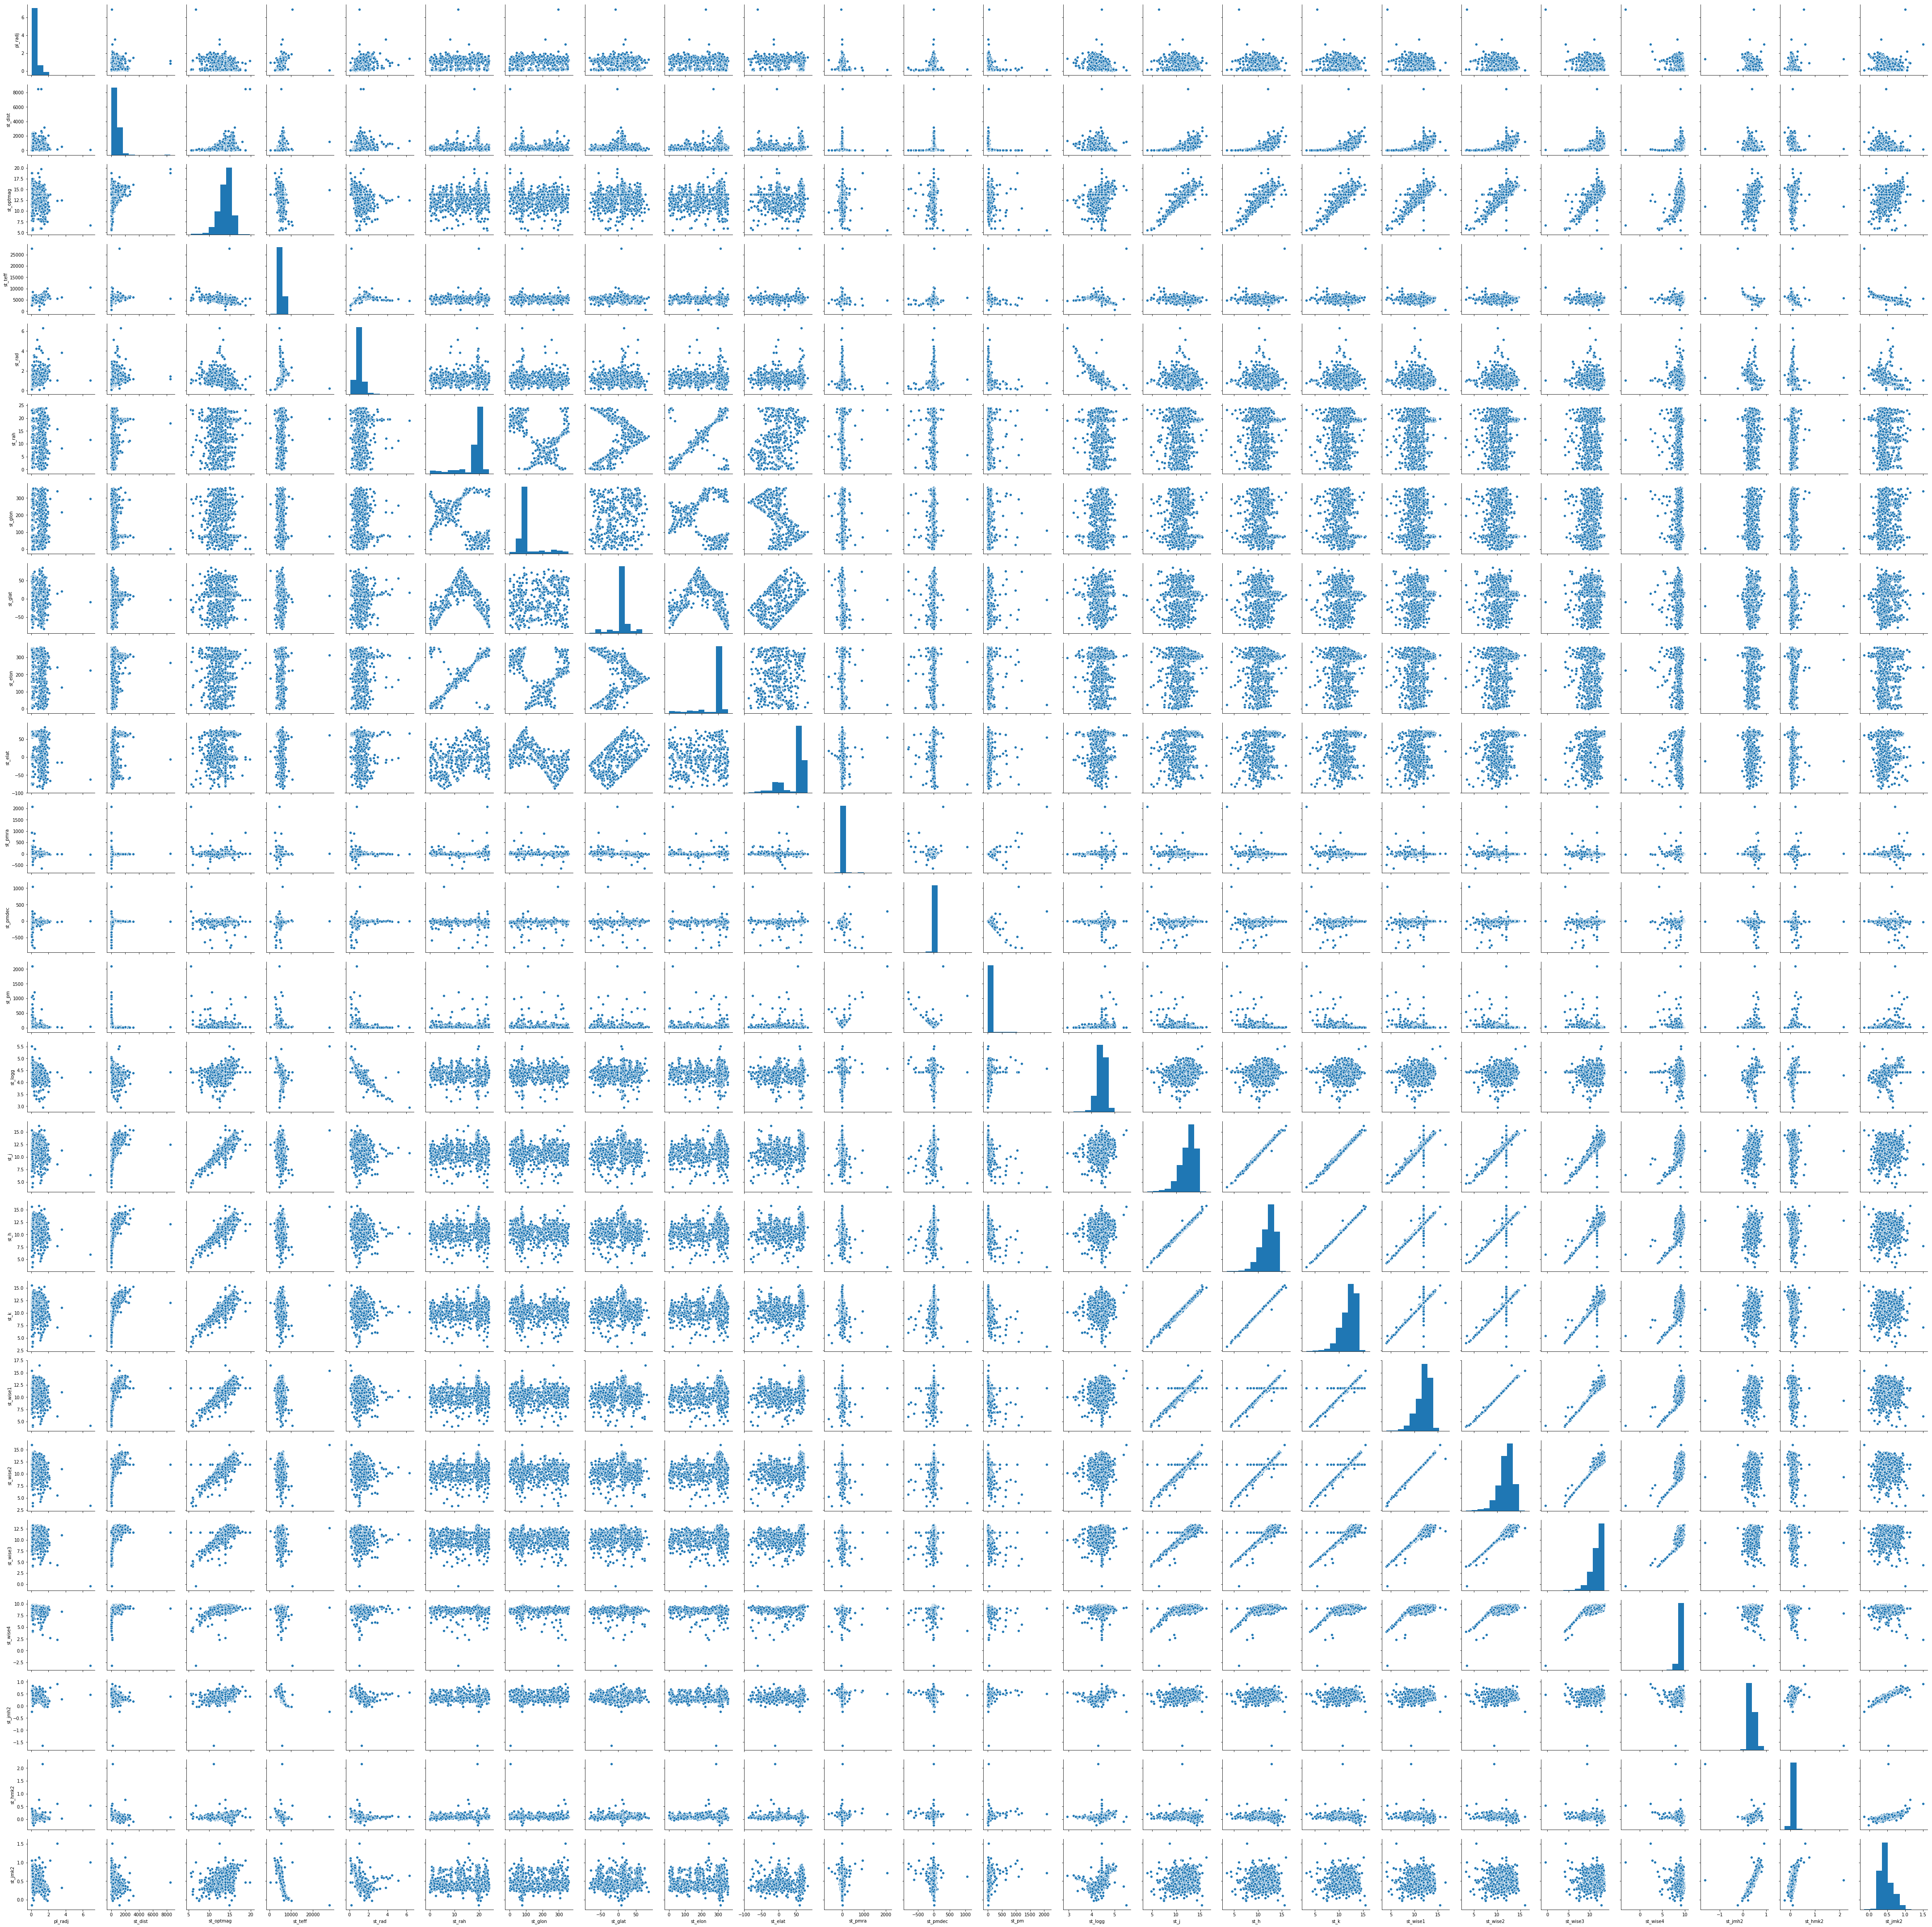

In [6]:
sns.pairplot(planet_data)

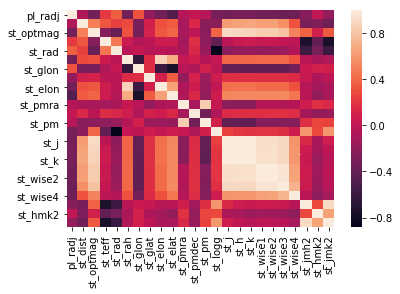

In [7]:
corr = planet_data.corr()
sns.heatmap(corr)

#### Observations
None of the data seems to be overtly correlated. To confirm this I directly check any correlations below.

In [18]:
corr_target = abs(corr['pl_radj'])
corr_features = corr_target[corr_target>0.5]
print('Features above .5 Pearson Correlation: \n', corr_features, '\n')
corr_features = corr_target[corr_target>0.25]
print('Features above .25 Pearson Correlation: \n', corr_features)

Features above .5 Pearson Correlation: 
 pl_radj    1.0
Name: pl_radj, dtype: float64 

Features above .25 Pearson Correlation: 
 pl_radj      1.000000
st_optmag    0.328743
st_rad       0.363699
st_rah       0.326479
st_glon      0.322036
st_elon      0.328505
st_elat      0.482116
st_logg      0.315803
st_j         0.323262
st_h         0.305637
st_k         0.304508
st_wise1     0.333309
st_wise2     0.337242
st_wise3     0.366402
st_wise4     0.360601
Name: pl_radj, dtype: float64


### Modeling
As seen above, the data doesn't really contain any strong correlations. To solve this issue, I am going to implement the recursive feature elemination to leave the best features in place as determined by the algorithm. The lack of correlation also likely means that typical regression algorithms like linear regression or stochastic gradient descent may not work as well, but I'll test them anyways.

In [9]:
from sklearn.model_selection import train_test_split, cross_validate


X = planet_data.drop(['pl_radj'], axis=1)
y = planet_data['pl_radj']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomTreesEmbedding, BaggingRegressor, AdaBoostRegressor

#Create the pipeline
pipeline = Pipeline([
    ('normalizer', MinMaxScaler()),
    ('feature_selection', RFE(RandomForestRegressor(n_estimators=20), 12)),
    ('regressor', LinearRegression())
])

#First round of models to test
models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          SGDRegressor(), 
          DecisionTreeRegressor(),
          KNeighborsRegressor(),
          RandomForestRegressor(n_estimators=20)]

#Cycle through the different models
for mod in models:
    pipeline.set_params(regressor = mod)
    cv = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)

    print("_" * 3)
    print(str(mod))
    for key, scores in cv.items():
        print(key, "mean: ", scores.mean())
    print("_" * 3)

___
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
fit_time mean:  6.487636089324951
score_time mean:  0.0011983871459960937
test_score mean:  0.3151170307106549
train_score mean:  0.3788359632185546
___
___
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
fit_time mean:  6.451776599884033
score_time mean:  0.0007996082305908204
test_score mean:  0.3109826729981249
train_score mean:  0.3775828116803899
___
___
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
fit_time mean:  6.504125261306763
score_time mean:  0.001197671890258789
test_score mean:  -0.0015920033329351214
train_score mean:  0.0
___


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 a

___
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
fit_time mean:  6.492372608184814
score_time mean:  0.0011779308319091798
test_score mean:  0.1412280963498727
train_score mean:  0.15090636264793195
___
___
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
fit_time mean:  6.550716352462769
score_time mean:  0.0013989925384521485
test_score mean:  0.37413429041350144
train_score mean:  0.985588506004

#### Observations
As suspected, the ensemble method dominated over the other algorithms, thus this will lead to testing more ensemble methods and picking the best one.

In [11]:
models = [RandomForestRegressor,
          GradientBoostingRegressor,
          BaggingRegressor,
          AdaBoostRegressor,
          ExtraTreesRegressor]

for mod in models:
    pipeline.set_params(regressor = mod(n_estimators=20))
    cv = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)

    print("_" * 3)
    print(str(mod))
    for key, scores in cv.items():
        print(key, "mean: ", scores.mean())
    print("_" * 3)

___
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
fit_time mean:  6.880906486511231
score_time mean:  0.004601001739501953
test_score mean:  0.612030600056557
train_score mean:  0.9323535073047504
___
___
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
fit_time mean:  6.515868377685547
score_time mean:  0.001398754119873047
test_score mean:  0.5750160443631173
train_score mean:  0.6425510401802613
___
___
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
fit_time mean:  6.80904483795166
score_time mean:  0.004999303817749023
test_score mean:  0.6221268585261013
train_score mean:  0.9336508115811114
___
___
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
fit_time mean:  6.587937450408935
score_time mean:  0.0028256893157958983
test_score mean:  0.22217105749177132
train_score mean:  0.3004945920114916
___
___
<class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
fit_time mean:  6.638703775405884
score_time mean:  0.004377841949462891
test_

In [22]:
pipeline.set_params(regressor = BaggingRegressor(n_estimators=200))
cross_val = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score= True)
cross_val

{'fit_time': array([9.73551893, 9.59777284, 9.77727675, 9.86225772, 9.28829885]),
 'score_time': array([0.01562476, 0.03125954, 0.03300714, 0.03300881, 0.03124332]),
 'test_score': array([0.61392575, 0.61009704, 0.68424717, 0.61197392, 0.67922267]),
 'train_score': array([0.94131449, 0.94578074, 0.94009243, 0.94252963, 0.941561  ])}

### Cross validation and hyperparameters
More tuning needs to be done with the model based on the cross validation scores. However, with minimal amounts of tuning done, the model can predict at roughly %60-65 accuracy. This is terrible for real world applications, so more adjustments to the model would be necessary to get something usable.

In [24]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6134455702845211

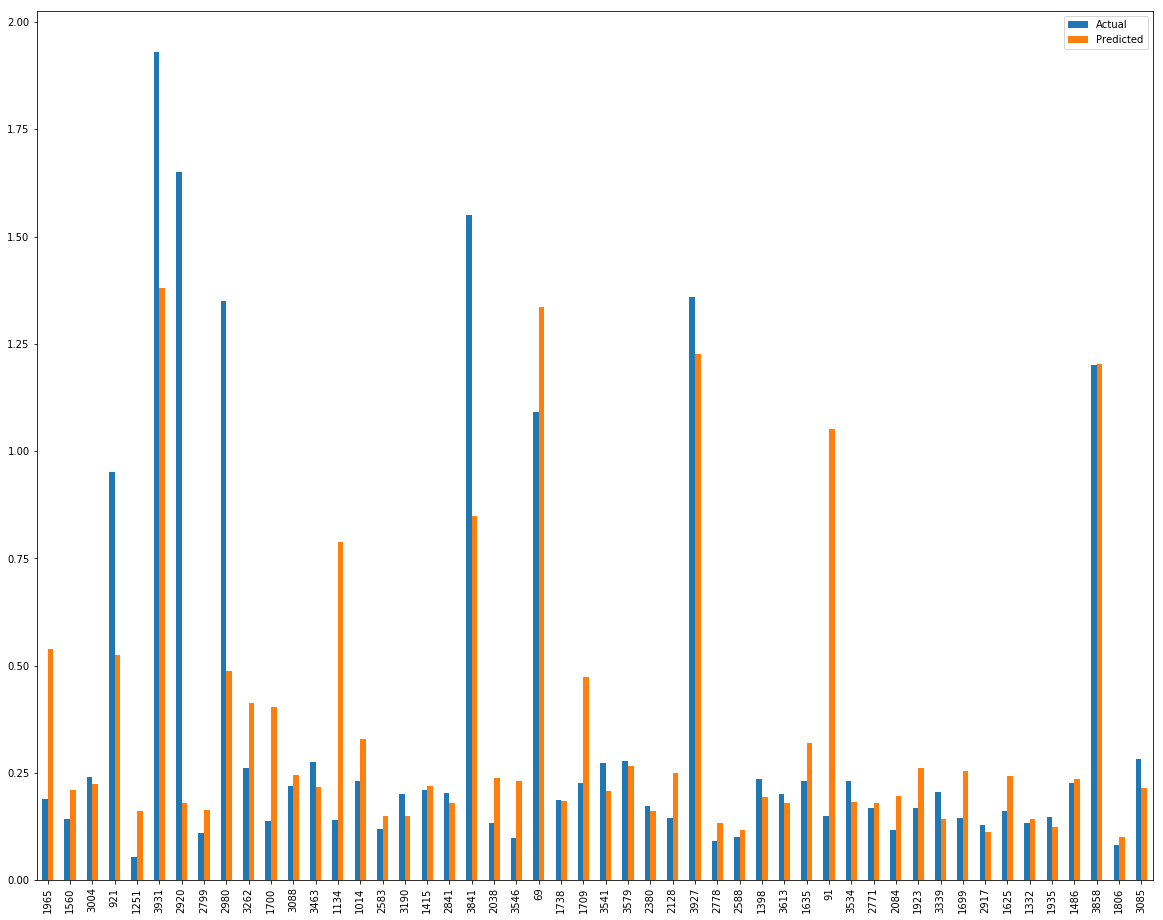

In [14]:
#Store the predictions
y_pred = pipeline.predict(X_test)
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#Plot the first 50 data points
diff.iloc[:50,:].plot(kind='bar',figsize=(20,16))
plt.show()

In [15]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Mean Absolute Error:  0.14777787522133212
Mean Squared Error:  0.09564619896687279
Root Mean Squared Error:  0.3092671967197181


### Improvement
When I originally started to play with this data, I was getting results around %6, so %60-65 is not all that bad. This project was meant to be used as a learning experiene for me and familiarize myself with some of the tools that are used in data science/machine learning. This project needs a few things done to get something usable:

#### Todo
* Implement hyperparameter searching with GridSearchCV
* Expand upon visualizations and graphs
* Attempt to use a neural network to see if results differ
* Maybe try different wrapper or embedded methods for feature selection